Section 1- Data Cleaning

In [361]:
import pandas as pd
import seaborn as sns

In [362]:
#Importing datasets
od1 = pd.read_excel('od1.xlsx', engine = 'openpyxl')
od2 = pd.read_excel('od2.xlsx', engine = 'openpyxl')
os = pd.read_excel('os.xlsx', engine = 'openpyxl')

Problem 1

In [363]:
#Merging datasets and sorting by ID
merged =pd.merge(od1, od2, how ='left', on=['dioptre_1', 'dioptre_2', 'Pachymetry', 'astigmatism', 'Diagnosis'])
sorted = merged.sort_values(by = ["ID"])

In [364]:
#Creating Sub-columns
def add_top_column(df, top_col, inplace=False):
    df.columns = pd.MultiIndex.from_product([[top_col], df.columns])
    return df
ID = sorted["ID"]
ID = pd.DataFrame(ID)
ID = add_top_column(ID, "")
Age = sorted["Age"]
Age = pd.DataFrame(Age)
Age = add_top_column(Age, "Age")
Gender = sorted["Gender"]
Gender = pd.DataFrame(Gender)
Gender = add_top_column(Gender, "Gender")
Diagnosis = sorted["Diagnosis"]
Diagnosis = pd.DataFrame(Diagnosis)
Diagnosis = add_top_column(Diagnosis, "Diagnosis")
Refractive_Defect = sorted[["dioptre_1", "dioptre_2", "astigmatism"]]
Refractive_Defect = pd.DataFrame(Refractive_Defect)
Refractive_Defect = add_top_column(Refractive_Defect, "Refractive_Defect")
PhakicPseudophakic = sorted["Phakic/Pseudophakic"]
PhakicPseudophakic = pd.DataFrame(PhakicPseudophakic)
PhakicPseudophakic = add_top_column(PhakicPseudophakic, "Phakic/Pseudophakic")
IOP = sorted[["Pneumatic","Perkins"]]
IOP = pd.DataFrame(IOP)
IOP = add_top_column(IOP, "IOP")
Pachymetry = sorted["Pachymetry"]
Pachymetry = pd.DataFrame(Pachymetry)
Pachymetry = add_top_column(Pachymetry, "Pachymetry")
Axial_Length = sorted["Axial_Length"]
Axial_Length = pd.DataFrame(Axial_Length)
Axial_Length = add_top_column(Axial_Length, "Axial_Length")
VF_MD = sorted["VF_MD"]
VF_MD = pd.DataFrame(VF_MD)
VF_MD = add_top_column(VF_MD, "VF_MD")
df_formatted = pd.concat([ID, Age, Gender, Diagnosis, Refractive_Defect, PhakicPseudophakic, IOP, Pachymetry,Axial_Length, VF_MD ], axis=1)
df_formatted.to_excel("df_formatted.xlsx")

Problem 2

In [365]:
#changing format of OS to match
tuples = [('', 'ID'), ('Age', 'Age'), ('Gender', 'Gender'), ('Diagnosis', 'Diagnosis'),
          ('Refractive_Defect', 'dioptre_1'), ('Refractive_Defect', 'dioptre_2'),
          ('Refractive_Defect', 'astigmatism'), ('Phakic/Pseudophakic', 'Phakic/Pseudophakic'),
          ('IOP', 'Pneumatic'), ('IOP', 'Perkins'), ('Pachymetry', 'Pachymetry'),
          ('Axial_Length', 'Axial_Length'), ('VF_MD', 'VF_MD')]
multi_index = pd.MultiIndex.from_tuples(tuples)
os.columns = multi_index

In [366]:
od_clean = df_formatted.copy(deep=True)
os_clean = os.copy(deep=True)

In [367]:
#removing subcolumns for both datasets
def rename_subcolumns(subcols):
    if subcols[0] == subcols[1]:
        return subcols[0].lower()
    else:
        return "_".join(subcols).lower()

od_clean.columns = od_clean.columns.map(rename_subcolumns)
os_clean.columns = os_clean.columns.map(rename_subcolumns)
os_clean = os_clean.drop(index=0)

      _id age  gender   diagnosis refractive_defect_dioptre_1  \
1    #002  47    male  suspicious                        -0.5   
2    #004  58  female    glaucoma                         1.5   
3    #005  89  female    glaucoma                        -0.5   
4    #006  69    male  suspicious                           1   
5    #007  22  female  suspicious                       -0.25   
..    ...  ..     ...         ...                         ...   
240  #289  64    male     healthY                        0.75   
241  #290  75  female     healthy                        0.25   
242  #291  55    male     healthy                         1.5   
243  #292  56  female     healthy                        1.25   
244  #293  39  female     healthy                       -0.75   

    refractive_defect_dioptre_2 refractive_defect_astigmatism  \
1                          -1.5                            88   
2                          -2.5                            85   
3                       

In [377]:
for column in od_clean.columns:
  od_clean_col = od_clean[column]
  column_dtype = od_clean_col.dtypes
  column_nas = od_clean_col.isna().sum()
  column_unique = len(od_clean_col.unique())
  column_min = min(od_clean[column])
  column_max = max(od_clean[column])
  print(f"Selected column: {column}")
  print(f"Data type: {column_dtype}")
  print(f"Number of NaNs: {column_nas}")
  print(f"Number of uniques: {column_unique}")
  print(f"Minimum: {column_min}")
  print(f"Maximum: {column_max}")
  print()

Selected column: _id
Data type: object
Number of NaNs: 0
Number of uniques: 244
Minimum: #002
Maximum: #293

Selected column: age
Data type: int64
Number of NaNs: 0
Number of uniques: 53
Minimum: 15
Maximum: 90

Selected column: gender
Data type: object
Number of NaNs: 0
Number of uniques: 2
Minimum: female
Maximum: male

Selected column: diagnosis
Data type: object
Number of NaNs: 0
Number of uniques: 3
Minimum: glaucoma
Maximum: suspicious

Selected column: refractive_defect_dioptre_1
Data type: float64
Number of NaNs: 15
Number of uniques: 43
Minimum: -6.5
Maximum: 6.0

Selected column: refractive_defect_dioptre_2
Data type: float64
Number of NaNs: 3
Number of uniques: 21
Minimum: -200.0
Maximum: 0.5

Selected column: refractive_defect_astigmatism
Data type: float64
Number of NaNs: 4
Number of uniques: 98
Minimum: -1.0
Maximum: 180.0



TypeError: '<' not supported between instances of 'float' and 'str'

In [380]:
for column in os_clean.columns:
    os_clean_col = os_clean[column]
    column_dtype = os_clean_col.dtypes
    column_nas = os_clean_col.isna().sum()
    
    if pd.api.types.is_numeric_dtype(os_clean_col):
        # Find the minimum and maximum values of the numeric column
        column_min = os_clean_col.min()
        column_max = os_clean_col.max()
        
        print(f"Selected column: {column}")
        print(f"Data type: {column_dtype}")
        print(f"Number of NaNs: {column_nas}")
        print(f"Minimum: {column_min}")
        print(f"Maximum: {column_max}")
        print()
    else:
        print(f"Selected column: {column}")
        print(f"Data type: {column_dtype}")
        print(f"Number of NaNs: {column_nas}")
        print("Column is not numeric")
        print()


Selected column: _id
Data type: object
Number of NaNs: 0
Column is not numeric

Selected column: age
Data type: object
Number of NaNs: 0
Column is not numeric

Selected column: gender
Data type: object
Number of NaNs: 0
Column is not numeric

Selected column: diagnosis
Data type: object
Number of NaNs: 0
Column is not numeric

Selected column: refractive_defect_dioptre_1
Data type: object
Number of NaNs: 12
Column is not numeric

Selected column: refractive_defect_dioptre_2
Data type: object
Number of NaNs: 5
Column is not numeric

Selected column: refractive_defect_astigmatism
Data type: object
Number of NaNs: 5
Column is not numeric

Selected column: phakic/pseudophakic
Data type: object
Number of NaNs: 6
Column is not numeric

Selected column: iop_pneumatic
Data type: object
Number of NaNs: 45
Column is not numeric

Selected column: iop_perkins
Data type: object
Number of NaNs: 180
Column is not numeric

Selected column: pachymetry
Data type: object
Number of NaNs: 7
Column is not n

In [379]:
for column in os_clean.columns:
  os_clean_col = os_clean[column]
  column_dtype = os_clean_col.dtypes
  column_nas = os_clean_col.isna().sum()
  column_min = min(os_clean_col)
  column_max = max(os_clean_col)
  print(f"Selected column: {column}")
  print(f"Data type: {column_dtype}")
  print(f"Number of NaNs: {column_nas}")
  print(f"Minimum: {column_min}")
  print(f"Maximum: {column_max}")
  print()

Selected column: _id
Data type: object
Number of NaNs: 0
Minimum: #002
Maximum: #293

Selected column: age
Data type: object
Number of NaNs: 0
Minimum: 15
Maximum: 90

Selected column: gender
Data type: object
Number of NaNs: 0
Minimum: female
Maximum: male

Selected column: diagnosis
Data type: object
Number of NaNs: 0
Minimum: Glaucoma
Maximum: suspicious

Selected column: refractive_defect_dioptre_1
Data type: object
Number of NaNs: 12
Minimum: -8
Maximum: 11.25

Selected column: refractive_defect_dioptre_2
Data type: object
Number of NaNs: 5
Minimum: -75
Maximum: 2

Selected column: refractive_defect_astigmatism
Data type: object
Number of NaNs: 5
Minimum: 0
Maximum: 180



TypeError: '<' not supported between instances of 'float' and 'str'

In [371]:
#Filling Na's, some with rounded means, some with 0
mean_dio1 = od_clean['Refractive_Defect','dioptre_1'].mean()
round_dio1 = round(mean_dio1 / 0.25) * 0.25
od_clean['Refractive_Defect', 'dioptre_1'] = od_clean['Refractive_Defect', 'dioptre_1'].fillna(round_dio1)

mean_dio2 = od_clean['Refractive_Defect','dioptre_2'].mean()
round_dio2 = round(mean_dio2 / 0.25) * 0.25
od_clean['Refractive_Defect', 'dioptre_2'] = od_clean['Refractive_Defect', 'dioptre_2'].fillna(round_dio2)

mean_ast = od_clean['Refractive_Defect','astigmatism'].mean()
round_ast = round(mean_ast)
od_clean['Refractive_Defect', 'astigmatism'] = od_clean['Refractive_Defect', 'astigmatism'].fillna(round_ast)

mode_pp = str(od_clean[('Phakic/Pseudophakic', 'Phakic/Pseudophakic')].mode().iloc[0])
od_clean['Phakic/Pseudophakic', 'Phakic/Pseudophakic'] = od_clean['Phakic/Pseudophakic', 'Phakic/Pseudophakic'].fillna(mode_pp)

mean_pne = od_clean['IOP', 'Pneumatic'].mean()
round_pne = round(mean_pne)
od_clean['IOP', 'Pneumatic'] = od_clean['IOP', 'Pneumatic'].fillna(round_pne)

mean_per = od_clean['IOP', 'Perkins'].mean()
round_per = round(mean_per)
od_clean['IOP', 'Perkins'] = od_clean['IOP', 'Perkins'].fillna(round_per)

mean_pach = od_clean['Pachymetry', 'Pachymetry'].mean()
round_pach = round(mean_pach)
od_clean['Pachymetry', 'Pachymetry'] = od_clean['Pachymetry', 'Pachymetry'].fillna(round_pach)


od_clean['Axial_Length', 'Axial_Length'] = od_clean['Axial_Length', 'Axial_Length'].fillna(26)

mean_vf = od_clean['VF_MD', 'VF_MD'].mean()
round_vf = round(mean_vf/0.01)*0.01
od_clean['VF_MD', 'VF_MD'] = od_clean['VF_MD', 'VF_MD'].fillna(round_vf)

od_clean.to_excel("od_clean.xlsx")

KeyError: ('Refractive_Defect', 'dioptre_1')

In [ ]:
#Same for os_clean, extra few lines as different format
os_clean_dio1 = os_clean['Refractive_Defect','dioptre_1']
os_clean_dio1 = pd.to_numeric(os_clean_dio1, errors='coerce')
mean_dio1 = os_clean_dio1.mean()
round_dio1 = round(mean_dio1 / 0.25) * 0.25
os_clean['Refractive_Defect', 'dioptre_1'] = os_clean['Refractive_Defect', 'dioptre_1'].fillna(round_dio1)

os_clean_dio2 = os_clean['Refractive_Defect','dioptre_2']
os_clean_dio2 = pd.to_numeric(os_clean_dio2, errors='coerce')
mean_dio2 = os_clean_dio2.mean()
round_dio2 = round(mean_dio2 / 0.25) * 0.25
os_clean['Refractive_Defect', 'dioptre_2'] = os_clean['Refractive_Defect', 'dioptre_2'].fillna(round_dio2)

os_clean_ast = os_clean['Refractive_Defect','astigmatism']
os_clean_ast = pd.to_numeric(os_clean_dio1, errors='coerce')
mean_ast = os_clean_ast.mean()
round_ast = round(mean_ast)
os_clean['Refractive_Defect', 'astigmatism'] = os_clean['Refractive_Defect', 'astigmatism'].fillna(round_ast)

mode_pp = str(os_clean[('Phakic/Pseudophakic', 'Phakic/Pseudophakic')].mode().iloc[0])
os_clean['Phakic/Pseudophakic', 'Phakic/Pseudophakic'] = os_clean['Phakic/Pseudophakic', 'Phakic/Pseudophakic'].fillna(mode_pp)

os_clean_pne = os_clean['IOP', 'Pneumatic']
os_clean_pne = pd.to_numeric(os_clean_pne, errors='coerce')
mean_pne = os_clean_pne.mean()
round_pne = round(mean_pne)
os_clean['IOP', 'Pneumatic'] = os_clean['IOP', 'Pneumatic'].fillna(round_pne)

os_clean_per = os_clean['IOP', 'Perkins']
os_clean_per = pd.to_numeric(os_clean_per, errors='coerce')
mean_per = os_clean_per.mean()
round_per = round(mean_per)
os_clean['IOP', 'Perkins'] = os_clean['IOP', 'Perkins'].fillna(round_per)

os_clean_pach = os_clean['Pachymetry', 'Pachymetry']
os_clean_pach = pd.to_numeric(os_clean_pach, errors='coerce')
mean_pach = os_clean_pach.mean()
round_pach = round(mean_pach)
os_clean['Pachymetry', 'Pachymetry'] = os_clean['Pachymetry', 'Pachymetry'].fillna(round_pach)


os_clean['Axial_Length', 'Axial_Length'] = os_clean['Axial_Length', 'Axial_Length'].fillna(26)

os_clean_vf = os_clean['VF_MD', 'VF_MD']
os_clean_vf = pd.to_numeric(os_clean_vf, errors='coerce')
mean_vf = os_clean_vf.mean()
round_vf = round(mean_vf/0.01)*0.01
os_clean['VF_MD', 'VF_MD'] = os_clean['VF_MD', 'VF_MD'].fillna(round_vf)

print(os_clean.iloc[0, :])
os_clean = os_clean.drop(os_clean.index[0])
os_clean.to_excel("os_clean.xlsx")


                     ID                                      ID
Age                  Age                                    Age
Gender               Gender                              Gender
Diagnosis            Diagnosis                        Diagnosis
Refractive_Defect    dioptre_1                        dioptre_1
                     dioptre_2                        dioptre_2
                     astigmatism                    astigmatism
Phakic/Pseudophakic  Phakic/Pseudophakic    Phakic/Pseudophakic
IOP                  Pneumatic                        Pneumatic
                     Perkins                            Perkins
Pachymetry           Pachymetry                      Pachymetry
Axial_Length         Axial_Length                  Axial_Length
VF_MD                VF_MD                                VF_MD
Name: 0, dtype: object


In [ ]:
#Confirming no duplicates
duplicates = od_clean.duplicated()
print(od_clean[duplicates == True])
duplicates = os_clean.duplicated()
print(os_clean[duplicates == True])

Empty DataFrame
Columns: [(, ID), (Age, Age), (Gender, Gender), (Diagnosis, Diagnosis), (Refractive_Defect, dioptre_1), (Refractive_Defect, dioptre_2), (Refractive_Defect, astigmatism), (Phakic/Pseudophakic, Phakic/Pseudophakic), (IOP, Pneumatic), (IOP, Perkins), (Pachymetry, Pachymetry), (Axial_Length, Axial_Length), (VF_MD, VF_MD)]
Index: []
Empty DataFrame
Columns: [(, ID), (Age, Age), (Gender, Gender), (Diagnosis, Diagnosis), (Refractive_Defect, dioptre_1), (Refractive_Defect, dioptre_2), (Refractive_Defect, astigmatism), (Phakic/Pseudophakic, Phakic/Pseudophakic), (IOP, Pneumatic), (IOP, Perkins), (Pachymetry, Pachymetry), (Axial_Length, Axial_Length), (VF_MD, VF_MD)]
Index: []


minimum: 15
maximum: 90


<AxesSubplot: >

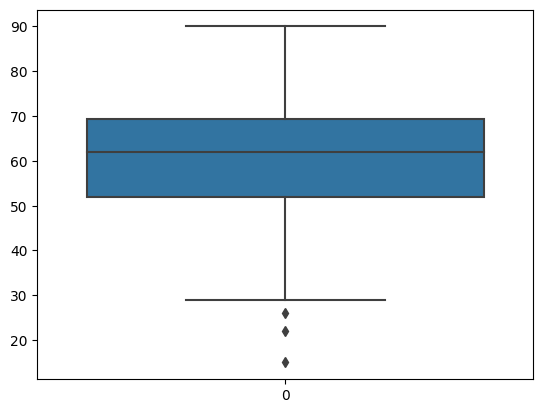

In [ ]:
od_clean_age = od_clean['Age','Age']
print('minimum:', min(od_clean_age))
print('maximum:', max(od_clean_age))
sns.boxplot(data = od_clean_age)




In [ ]:
os_clean_age = os_clean['Age','Age']
os_clean_age = pd.to_numeric(os_clean_age, errors='coerce')
print('minimum:', min(os_clean_age))
print('maximum:', max(os_clean_age))

minimum: 15
maximum: 90


In [ ]:
df_clean['Gender','Gender'] = df_clean['Gender','Gender'].replace({'male':0, 'female':1})


